# Problem statement for project
This is described on the Kaggle competition description page here. Here are the highlights to note.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

   ## For Data Analysis Libraries

In [3]:
import pandas as pd
import numpy as np
import random as rnd

# For Visualizations

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

 # Machinelearning

In [5]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
 # Read Train and test set

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [8]:
# let combine

combine = [train_df, test_df]

In [9]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

# Analyze Data

In [10]:
# checking column names 
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# See types of features we have in table

In [13]:
# 1. categorical
####Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

# 2. Numeric 
####Continous: Age, Fare. Discrete: SibSp, Parch.

In [14]:
# Preview the head
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Here are some observations

In [16]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
# Cabin > Age are incomplete in case of test dataset.

In [18]:
# Explore information on train_df dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
# on test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Some important observations

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# We can see easily that Survived is categorical and have values 1, 0

train_df[train_df['Survived'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Name           342 non-null object
Sex            342 non-null object
Age            290 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Ticket         342 non-null object
Fare           342 non-null float64
Cabin          136 non-null object
Embarked       340 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


In [22]:
# survival from the available train_df of 891 
print(round((342 / 891)*100 , 2), "%")

38.38 %


In [23]:
# So we know we have only some part of it all passengers in titanic of 2224 as only 891
print(round((891 / 2224 ) * 100,2),"%")

40.06 %


In [24]:
#  Now lets see the passengers for siblings etc.

# Passengers with no siblings

train_df[train_df['SibSp']==0].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 2 to 890
Data columns (total 12 columns):
PassengerId    608 non-null int64
Survived       608 non-null int64
Pclass         608 non-null int64
Name           608 non-null object
Sex            608 non-null object
Age            471 non-null float64
SibSp          608 non-null int64
Parch          608 non-null int64
Ticket         608 non-null object
Fare           608 non-null float64
Cabin          126 non-null object
Embarked       606 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 61.8+ KB


In [25]:
# below is valuable information for us about passengers without siblings

round((608 / 891 )*100,2)

68.24

In [26]:
#Summary

# Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
# Survived is a categorical feature with 0 or 1 values.
# Around 38% samples survived representative of the actual survival rate at 32%.
# Most passengers (> 75%) did not travel with parents or children.
# Nearly 30% of the passengers had siblings and/or spouse aboard.
# Fares varied significantly with few passengers (<1%) paying as high as $512.
# Few elderly passengers (<1%) within age range 65-80.

In [27]:
# see the max fare for titanic

max(train_df['Fare'])

512.32920000000001

In [28]:
# Observe value passengers of having fare value greater than 500

train_df[ train_df['Fare'] > 500 ].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0000
mean,559.000000,1.0,1.0,35.333333,0.0,0.333333,512.3292
std,261.421116,0.0,0.0,0.577350,0.0,0.577350,0.0000
min,259.000000,1.0,1.0,35.000000,0.0,0.000000,512.3292
25%,469.500000,1.0,1.0,35.000000,0.0,0.000000,512.3292
50%,680.000000,1.0,1.0,35.000000,0.0,0.000000,512.3292
75%,709.000000,1.0,1.0,35.500000,0.0,0.500000,512.3292
max,738.000000,1.0,1.0,36.000000,0.0,1.000000,512.3292


In [38]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
train_df[train_df['Sex']=='female'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [43]:
train_df[train_df['Sex']=='female'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 12 columns):
PassengerId    314 non-null int64
Survived       314 non-null int64
Pclass         314 non-null int64
Name           314 non-null object
Sex            314 non-null object
Age            261 non-null float64
SibSp          314 non-null int64
Parch          314 non-null int64
Ticket         314 non-null object
Fare           314 non-null float64
Cabin          97 non-null object
Embarked       312 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 31.9+ KB


In [45]:
# Female are 

(314 / 891) * 100


35.24130190796858

In [54]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sutton, Mr. Frederick",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [57]:
# To get corelations
# We will exclude and include columns
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


 

# Assumtions after data analysis

Here are some factors:

Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.
Classifying.

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.




In [73]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [74]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [75]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [77]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Visualize the dataset

In [78]:
# First see with categorical fashion

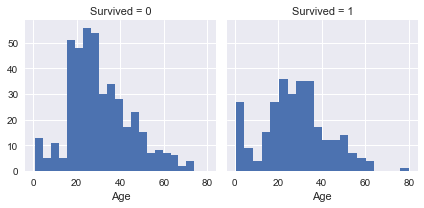

In [89]:
fit = sns.FacetGrid(train_df,col='Survived') #face
fit.map(plt.hist,'Age',bins=20) # plot on each

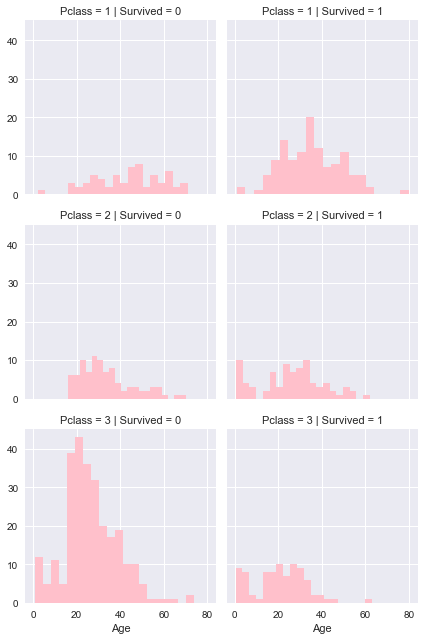

In [102]:
g = sns.FacetGrid(train_df, col='Survived',row='Pclass')

g.map(plt.hist,'Age',bins=20, color='pink')


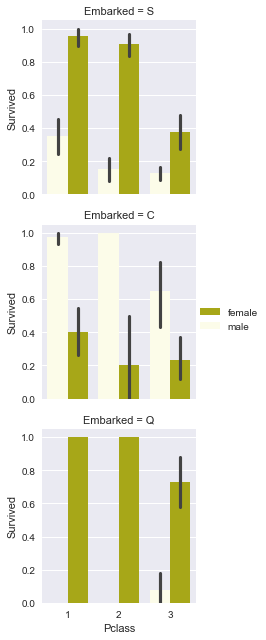

In [111]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.barplot, 'Pclass', 'Survived', 'Sex',color='y')
grid.add_legend()

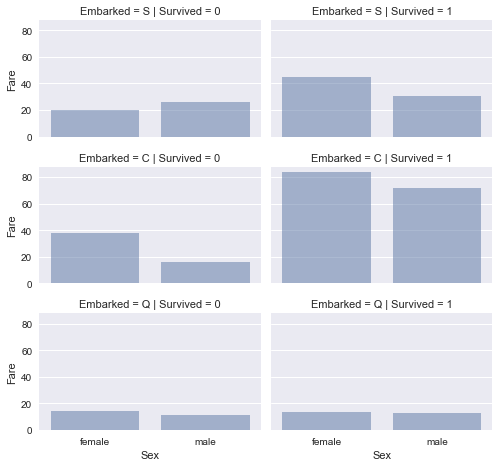

In [112]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)